In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_csv('../data/training_mush.csv')

In [7]:
# Произведем первичный осмотр датасета
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6093 entries, 0 to 6092
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 6093 non-null   int64
 1   cap-surface               6093 non-null   int64
 2   cap-color                 6093 non-null   int64
 3   bruises                   6093 non-null   int64
 4   odor                      6093 non-null   int64
 5   gill-attachment           6093 non-null   int64
 6   gill-spacing              6093 non-null   int64
 7   gill-size                 6093 non-null   int64
 8   gill-color                6093 non-null   int64
 9   stalk-shape               6093 non-null   int64
 10  stalk-root                6093 non-null   int64
 11  stalk-surface-above-ring  6093 non-null   int64
 12  stalk-surface-below-ring  6093 non-null   int64
 13  stalk-color-above-ring    6093 non-null   int64
 14  stalk-color-below-ring    6093 non-null 

In [11]:
# Пропущенных значений нет
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [12]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,...,6093.000000,6093.000000,6093.0,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000
mean,3.357624,1.836862,4.500246,0.416051,4.171672,0.975546,0.161169,0.308551,4.806992,0.568849,...,5.809125,5.790415,0.0,1.968160,1.068767,2.276711,3.589201,3.639422,1.497292,0.482521
std,1.608300,1.231684,2.547747,0.492943,2.114982,0.154467,0.367717,0.461933,3.551632,0.495278,...,1.907454,1.917425,0.0,0.231266,0.271237,1.802159,2.381904,1.265664,1.716782,0.499735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


In [16]:
# Выделим данные на которых будет обучать модель и целевой признак
X = df.drop('class',axis=1)
y = df['class']

In [20]:
# Проверка размерности
assert X.shape[0]== y.shape[0]

### 3.5.2
Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)
Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10
max_depth: от 1 до 12 с шагом 2
min_samples_leaf: от 1 до 7
min_samples_split: от 2 до 9 с шагом 2
Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [13]:
# Создадим модель случайного леса
rf = RandomForestClassifier(random_state=0)

In [25]:
# Создадим параметры которые будем передавать в gridsearch
params = {'n_estimators':range(10,51,10),'min_samples_leaf':range(1,8),
          'min_samples_split':range(2,10,2),'max_depth':range(1,13,2)}

In [29]:
# Начнем подбор оптимальных параметров
grid_search = GridSearchCV(rf,params,cv=3,n_jobs=-1,verbose=1)

In [30]:
grid_search.fit(X,y,)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [33]:
best_params = grid_search.best_params_
best_params

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [36]:
# Модельс  лучшими параметрами
best_clf = grid_search.best_estimator_
best_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
# получаем важность признаков
feature_importances=best_clf.feature_importances_

In [43]:
# Создаем датафрейм чтобы было легче сортировать и делать графику
feature_df = pd.DataFrame({'features':X.columns,'Степень влияния':feature_importances})
feature_df = feature_df.set_index('features')

In [44]:
sorted_feature_df = feature_df.sort_values('Степень влияния',ascending=False)
sorted_feature_df

,Степень влияния
features,
odor,0.188376
gill-color,0.103861
stalk-root,0.103793
spore-print-color,0.083564
gill-spacing,0.080840
ring-type,0.070726
bruises,0.070109
gill-size,0.068461
stalk-surface-below-ring,0.048296


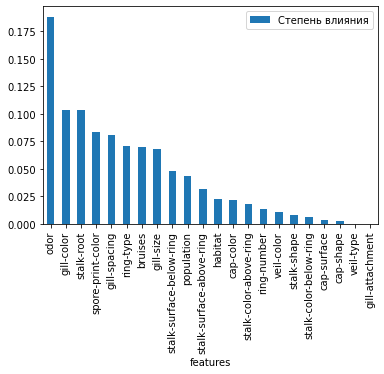

In [47]:
sorted_feature_df.plot(kind='bar')

### 3.5.5
Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

 

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор


In [48]:
df_test = pd.read_csv('../data/testing_mush.csv')

In [50]:
df_test.shape,df.shape

((2031, 22), (6093, 23))

In [51]:
# Предскажем какой гриб сьедобный а какой ядовитый(класс 1)
predicted = best_clf.predict(df_test)

In [54]:
pred_series = pd.Series(predicted)

In [57]:
# Можно было сделать так
pred_series.value_counts()

0    1055
1     976
dtype: int64

In [58]:
# А можно было еще проще. Так как у нас 0 и 1. То сумм очевидно будет равна количеству единиц
sum(predicted)

976

In [59]:
# Такой вариант тоже хорош.
np.count_nonzero(predicted)

976

### 3.5.6
Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

In [60]:
y_test = pd.read_csv('../data/testing_y_mush.csv')

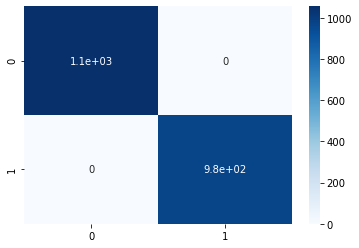

In [65]:
# confusion matrix
conf_matr = confusion_matrix(y_test,pred_series)
sns.heatmap(conf_matr,annot=True,cmap='Blues');

### 3.5.7
Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [67]:
# Считываем данные
train = pd.read_csv('../data/invasion.csv')
test = pd.read_csv('../data/operative_information.csv')

In [68]:
train.shape,test.shape

((500, 7), (1500, 6))

In [69]:
train.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [70]:
test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


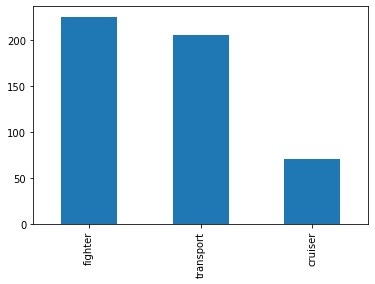

In [73]:
train['class'].value_counts().plot(kind='bar')

In [76]:
# Выделим целевой признак
X = train.drop('class',axis=1)
y = train['class']

In [74]:
# Создадим модель
rf = RandomForestClassifier(random_state=0)
params = {'n_estimators':range(10,51,10),'min_samples_leaf':range(1,8),
          'min_samples_split':range(2,10,2),'max_depth':range(1,13,2)}

In [77]:
grid2 = GridSearchCV(rf,params,cv=5,n_jobs=-1)
grid2.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [80]:
best_clf = grid2.best_estimator_

In [84]:
fea_df = pd.DataFrame({'features':X.columns,'value':best_clf.feature_importances_})
fea_df = fea_df.sort_values('value',ascending=False)

In [ ]:
sns.barplot(x='features',y='value',data=fea_df);

In [87]:
predicted = best_clf.predict(test)

In [90]:
# Превращаем в серию для удобства
ser = pd.Series(predicted)
ser.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [91]:
# Можно делать через счетчик коллекций
import collections

collections.Counter(predicted)


Counter({'fighter': 675, 'transport': 595, 'cruiser': 230})

In [92]:
# Факторизация для примера
# Соответственно, factors[0] даст array из преобразованных переменных, 
# а по factors[1] можно быстренько понять какое число к какому лейблу относится.
factor = pd.factorize(train['class'])

In [95]:
factor[1]

Index(['transport', 'fighter', 'cruiser'], dtype='object')

In [96]:
feat_df = pd.DataFrame(
    {'feature':X.columns,'value':best_clf.feature_importances_}).sort_values('value',ascending=False)


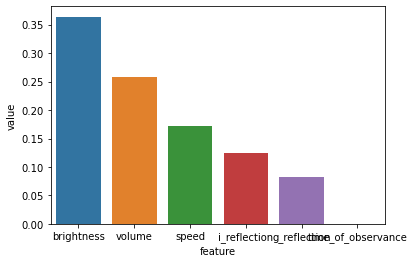

In [98]:
sns.barplot(x='feature',y='value',data=feat_df);

In [99]:
X.columns

Index(['g_reflection', 'i_reflection', 'speed', 'brightness',
       'time_of_observance', 'volume'],
      dtype='object')

### 3.5.13
Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [100]:
df = pd.read_csv('../data/space_can_be_a_dangerous_place.csv')

In [101]:
df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [116]:
df.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


In [102]:
df.shape

(100000, 8)

In [103]:
df.columns

Index(['r', 'phi', 'peradventure_index', 'dustiness', 'black_hole_is_near',
       'buggers_were_noticed', 'nearby_system_has_planemo', 'dangerous'],
      dtype='object')

In [105]:
# Целевой признак dangerous. Разделим дата сет
X = df.drop('dangerous',axis=1)
y = df['dangerous'] 

In [106]:
rf = RandomForestClassifier()

In [107]:
grid_alien = GridSearchCV(rf,params,cv=5,n_jobs=-1)

In [108]:
grid_alien.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [110]:
grid_alien.best_params_

{'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 20}

In [109]:
best_clf = grid_alien.best_estimator_

In [111]:
feat_df = pd.DataFrame(
    {'feature':X.columns,'value':best_clf.feature_importances_}).sort_values('value',ascending=False)

In [112]:
feat_df

,feature,value
5,buggers_were_noticed,0.576308
6,nearby_system_has_planemo,0.371892
4,black_hole_is_near,0.016901
0,r,0.009107
3,dustiness,0.009033
1,phi,0.008665
2,peradventure_index,0.008094


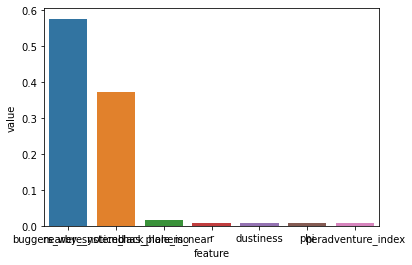

In [115]:
sns.barplot(x='feature',y='value',data=feat_df);